# **NLP analysis Elon Musk tweets before,during and after ownership of X**

## **Imports of libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re

## **Data Loading**

In [ ]:
#load the data from the published Google Sheets CSV link
csv_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTBbpEdmnMSOh4RVolHTe88K1bLbf_PR-0HneZT6Nl960A_mloXgqbnYenuXzPLYFpSZCwSueDDWGnG/pub?gid=569203913&single=true&output=csv'
df = pd.read_csv(csv_url, low_memory=False)

In [ ]:
#clean column names by stripping whitespace
df.columns = df.columns.str.strip()
df

,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,...,inReplyToUserId,inReplyToUsername,isPinned,isRetweet,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet
0,1.655160e+18,https://x.com/elonmusk/status/1655159652990976000,https://twitter.com/elonmusk/status/1655159652...,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.657262e+18,https://x.com/elonmusk/status/1657261624867299339,https://twitter.com/elonmusk/status/1657261624...,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.623774e+18,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/status/1623774484...,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,2023-02-09 20:03:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.656900e+18,https://x.com/elonmusk/status/1656900119202254854,https://twitter.com/elonmusk/status/1656900119...,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,2023-05-12 05:52:26+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.616532e+18,https://x.com/elonmusk/status/1616531874763116544,https://twitter.com/elonmusk/status/1616531874...,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,2023-01-20 20:23:27+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55094,1.863748e+18,https://x.com/elonmusk/status/1863748322424402395,https://twitter.com/elonmusk/status/1863748322...,@alx Cool,89.0,150.0,1713.0,5.0,49542.0,2024-12-03 00:53:21+00:00,...,534023.0,alx,False,False,False,False,NaN,NaN,NaN,NaN
55095,1.863740e+18,https://x.com/elonmusk/status/1863740336331170304,https://twitter.com/elonmusk/status/1863740336...,@alx She is an activist posing as a judge,342.0,342.0,3682.0,20.0,66865.0,2024-12-03 00:21:37+00:00,...,534023.0,alx,False,False,False,False,NaN,NaN,NaN,NaN
55096,1.863740e+18,https://x.com/elonmusk/status/1863740028406337896,https://twitter.com/elonmusk/status/1863740028...,Absolutely,9675.0,2253.0,81839.0,151.0,40855449.0,2024-12-03 00:20:24+00:00,...,NaN,NaN,False,False,True,False,NaN,1.863738e+18,"{'type': 'tweet', 'id': '1863737832818479385',...",NaN
55097,1.863737e+18,https://x.com/elonmusk/status/1863736644773220593,https://twitter.com/elonmusk/status/1863736644...,@BillyM2k Absolutely,94.0,168.0,1812.0,10.0,58877.0,2024-12-03 00:06:57+00:00,...,30699048.0,BillyM2k,False,False,False,False,NaN,NaN,NaN,NaN


## **Datetime conversion (tz-naive)**

In [ ]:
#convert 'createdAt' to datetime (making it to tz-naive for consistency)
df['createdAt'] = pd.to_datetime(df['createdAt']).dt.tz_localize(None)
df

,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,...,inReplyToUserId,inReplyToUsername,isPinned,isRetweet,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet
0,1.655160e+18,https://x.com/elonmusk/status/1655159652990976000,https://twitter.com/elonmusk/status/1655159652...,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.657262e+18,https://x.com/elonmusk/status/1657261624867299339,https://twitter.com/elonmusk/status/1657261624...,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.623774e+18,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/status/1623774484...,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,2023-02-09 20:03:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.656900e+18,https://x.com/elonmusk/status/1656900119202254854,https://twitter.com/elonmusk/status/1656900119...,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,2023-05-12 05:52:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.616532e+18,https://x.com/elonmusk/status/1616531874763116544,https://twitter.com/elonmusk/status/1616531874...,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,2023-01-20 20:23:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55094,1.863748e+18,https://x.com/elonmusk/status/1863748322424402395,https://twitter.com/elonmusk/status/1863748322...,@alx Cool,89.0,150.0,1713.0,5.0,49542.0,2024-12-03 00:53:21,...,534023.0,alx,False,False,False,False,NaN,NaN,NaN,NaN
55095,1.863740e+18,https://x.com/elonmusk/status/1863740336331170304,https://twitter.com/elonmusk/status/1863740336...,@alx She is an activist posing as a judge,342.0,342.0,3682.0,20.0,66865.0,2024-12-03 00:21:37,...,534023.0,alx,False,False,False,False,NaN,NaN,NaN,NaN
55096,1.863740e+18,https://x.com/elonmusk/status/1863740028406337896,https://twitter.com/elonmusk/status/1863740028...,Absolutely,9675.0,2253.0,81839.0,151.0,40855449.0,2024-12-03 00:20:24,...,NaN,NaN,False,False,True,False,NaN,1.863738e+18,"{'type': 'tweet', 'id': '1863737832818479385',...",NaN
55097,1.863737e+18,https://x.com/elonmusk/status/1863736644773220593,https://twitter.com/elonmusk/status/1863736644...,@BillyM2k Absolutely,94.0,168.0,1812.0,10.0,58877.0,2024-12-03 00:06:57,...,30699048.0,BillyM2k,False,False,False,False,NaN,NaN,NaN,NaN


## **Acquisition Date**

In [ ]:
#defining the acquisition date
acquisition_date = pd.to_datetime('2022-10-10')
#creating 'period' column based on acquisition date
df['period'] = df['createdAt'].apply(lambda x: 'before' if x < acquisition_date else 'after')
df

,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,...,inReplyToUsername,isPinned,isRetweet,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet,period
0,1.655160e+18,https://x.com/elonmusk/status/1655159652990976000,https://twitter.com/elonmusk/status/1655159652...,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,2023-05-07 10:36:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,after
1,1.657262e+18,https://x.com/elonmusk/status/1657261624867299339,https://twitter.com/elonmusk/status/1657261624...,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,2023-05-13 05:48:56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,after
2,1.623774e+18,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/status/1623774484...,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,2023-02-09 20:03:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,after
3,1.656900e+18,https://x.com/elonmusk/status/1656900119202254854,https://twitter.com/elonmusk/status/1656900119...,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,2023-05-12 05:52:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,after
4,1.616532e+18,https://x.com/elonmusk/status/1616531874763116544,https://twitter.com/elonmusk/status/1616531874...,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,2023-01-20 20:23:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55094,1.863748e+18,https://x.com/elonmusk/status/1863748322424402395,https://twitter.com/elonmusk/status/1863748322...,@alx Cool,89.0,150.0,1713.0,5.0,49542.0,2024-12-03 00:53:21,...,alx,False,False,False,False,NaN,NaN,NaN,NaN,after
55095,1.863740e+18,https://x.com/elonmusk/status/1863740336331170304,https://twitter.com/elonmusk/status/1863740336...,@alx She is an activist posing as a judge,342.0,342.0,3682.0,20.0,66865.0,2024-12-03 00:21:37,...,alx,False,False,False,False,NaN,NaN,NaN,NaN,after
55096,1.863740e+18,https://x.com/elonmusk/status/1863740028406337896,https://twitter.com/elonmusk/status/1863740028...,Absolutely,9675.0,2253.0,81839.0,151.0,40855449.0,2024-12-03 00:20:24,...,NaN,False,False,True,False,NaN,1.863738e+18,"{'type': 'tweet', 'id': '1863737832818479385',...",NaN,after
55097,1.863737e+18,https://x.com/elonmusk/status/1863736644773220593,https://twitter.com/elonmusk/status/1863736644...,@BillyM2k Absolutely,94.0,168.0,1812.0,10.0,58877.0,2024-12-03 00:06:57,...,BillyM2k,False,False,False,False,NaN,NaN,NaN,NaN,after


## **Sentiment Analysis**

In [ ]:
#Sentiment analysis on 'fullText' column using TextBlob
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['fullText'].apply(get_sentiment)

## **Summary Statistics**

In [ ]:
#summary stats by period and sentiment
summary = df.groupby(['period','sentiment']).size().unstack(fill_value=0)

## **Calculation of Totals and percentages**

In [ ]:
#calculate total number of sentiments before and after the acquisition
tot_be = summary.loc['before'].sum()
tot_af = summary.loc['after'].sum()

#extract individual sentiment counts for 'before'
pos_b = summary.loc['before'].get('positive', 0)
neu_b = summary.loc['before'].get('neutral', 0)
neg_b = summary.loc['before'].get('negative', 0)

#extract individual sentiment counts for 'after'
pos_a = summary.loc['after'].get('positive', 0)
neu_a = summary.loc['after'].get('neutral', 0)
neg_a = summary.loc['after'].get('negative', 0)

#calculate percentage of each sentiment before acquisition
pos_pct_b = (pos_b / tot_be)*100 if tot_be else 0
neu_pct_b = (neu_b / tot_be)*100 if tot_be else 0
neg_pct_b = (neg_b / tot_be)*100 if tot_be else 0

#calculate percentage of each sentiment after acquisition
pos_pct_a = (pos_a / tot_af)*100 if tot_af else 0
neu_pct_a = (neu_a / tot_af)*100 if tot_af else 0
neg_pct_a = (neg_a / tot_af)*100 if tot_af else 0

## **Summary**

In [ ]:
#summary paragraph
summary_text = f"""
So here’s what I found from the tweets. Before the acquisition, there were {tot_be} tweets overall. Among those, {pos_b} tweets were positive, which is about {pos_pct_b:.1f}%, {neu_b} were neutral (~{neu_pct_b:.1f}%), and {neg_b} were negative, making up roughly {neg_pct_b:.1f}% of the total.

After the acquisition, the total tweets went up to {tot_af}. Positive tweets came to {pos_a} or {pos_pct_a:.1f}%, neutral tweets were {neu_a} ({neu_pct_a:.1f}%), and negative tweets counted {neg_a} ({neg_pct_a:.1f}%).

Looking at how things shifted, positive sentiment {('increased' if pos_pct_a > pos_pct_b else 'decreased')} from {pos_pct_b:.1f}% to {pos_pct_a:.1f}%. Neutral tweets {('rose slightly' if neu_pct_a > neu_pct_b else 'fell a bit')}, going from {neu_pct_b:.1f}% to {neu_pct_a:.1f}%. Negative tweets {('dropped' if neg_pct_a < neg_pct_b else 'rose')}, changing from {neg_pct_b:.1f}% to {neg_pct_a:.1f}% after the acquisition.

All in all, the overall vibe {('improved after the acquisition' if pos_pct_a > pos_pct_b and neg_pct_a < neg_pct_b else 'shifted somewhat' if pos_pct_a != pos_pct_b or neg_pct_a != neg_pct_b else 'stayed pretty steady')}.
"""

print(summary_text)


So here’s what I found from the tweets. Before the acquisition, there were 18816 tweets overall. Among those, 7150 tweets were positive, which is about 38.0%, 10200 were neutral (~54.2%), and 1466 were negative, making up roughly 7.8% of the total.

After the acquisition, the total tweets went up to 36283. Positive tweets came to 14058 or 38.7%, neutral tweets were 18362 (50.6%), and negative tweets counted 3863 (10.6%).

Looking at how things shifted, positive sentiment increased from 38.0% to 38.7%. Neutral tweets fell a bit, going from 54.2% to 50.6%. Negative tweets rose, changing from 7.8% to 10.6% after the acquisition.

All in all, the overall vibe shifted somewhat.



## **Visualisation**

### **Violin Plot**

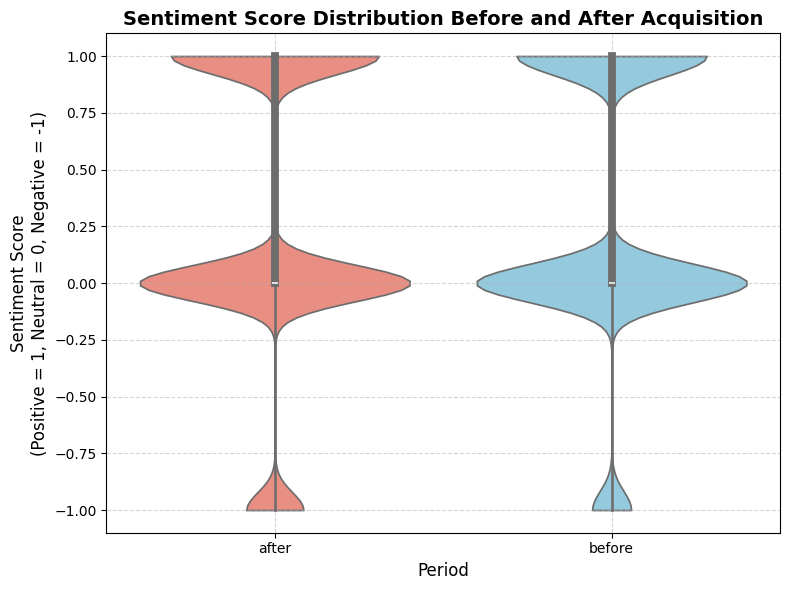

In [ ]:
#violinplot
# Sentiment mapping
sentiment_map = {'positive':1,'neutral':0,'negative':-1}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)
# Updated plot
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x='period',
    y='sentiment_score',
    hue='period',  # Required when using `palette`
    palette={'before':'skyblue','after':'salmon'},
    inner='box',
    density_norm='count',  # Replaces deprecated `scale='count'`
    cut=0,
    legend=False  # Prevents duplicate legend due to hue
)
plt.title('Sentiment Score Distribution Before and After Acquisition',fontsize=14,fontweight='bold')
plt.xlabel('Period',fontsize=12)
plt.ylabel('Sentiment Score\n(Positive = 1, Neutral = 0, Negative = -1)',fontsize=12)
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

### **Word Clouds**

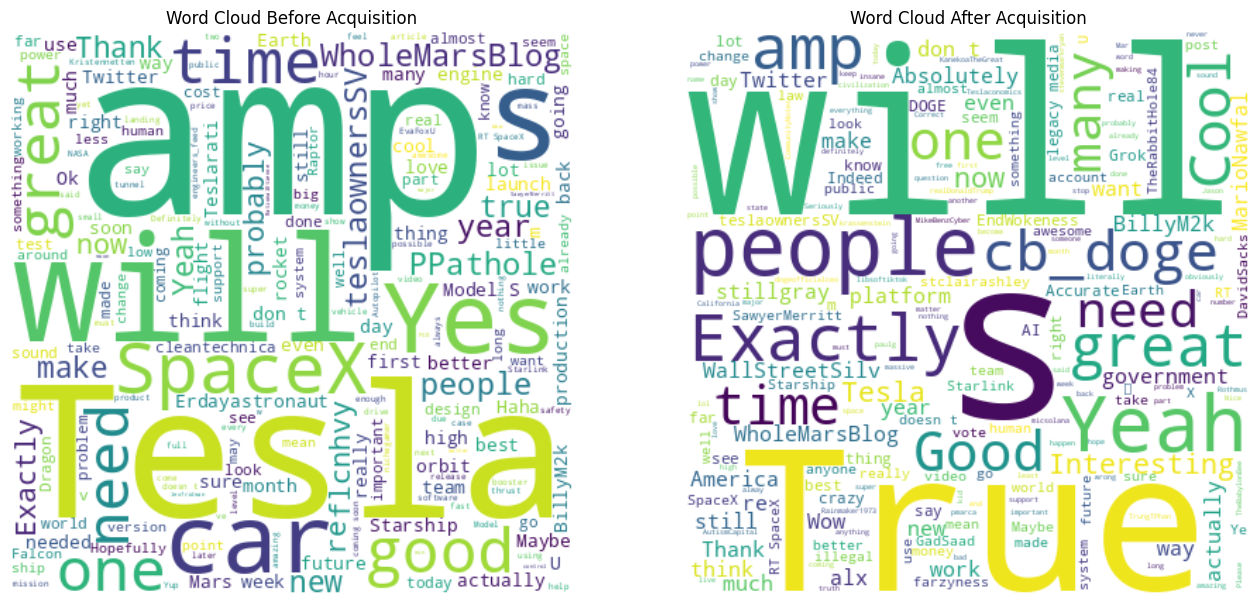

In [ ]:
#word clouds

#remove the url https links using regex matching
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)
#preprocess and clean the text
before_text = ' '.join(df[df['period'] == 'before']['fullText'].dropna().astype(str).apply(remove_urls))
after_text = ' '.join(df[df['period'] == 'after']['fullText'].dropna().astype(str).apply(remove_urls))
#generate word clouds
wordcloud_before = WordCloud(width=400, height=400, background_color='white').generate(before_text)
wordcloud_after = WordCloud(width=400, height=400, background_color='white').generate(after_text)
#Plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.title('Word Cloud Before Acquisition')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.title('Word Cloud After Acquisition')
plt.axis('off')
plt.show()